In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    
def displayMatchingFeatures(img1,img2,numFeatures):
    #create object for ORB detector
    orb = cv2.ORB_create()

    #find keypoints and descriptor
    kp1, desc1 = orb.detectAndCompute(img1, None)
    kp2, desc2 = orb.detectAndCompute(img2, None)

    #create brute force matcher
    bruteForce = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck= True)

    #match descriptors
    matchedDesc = bruteForce.match(desc1,desc2)

    #sort matched descriptor
    matchedDesc = sorted(matchedDesc, key=lambda x:x.distance)

    # Display first 'numFeatures' matches.
    imageMatched = cv2.drawMatches(img1,kp1,img2,kp2,matchedDesc[:numFeatures],None,flags=2)

    display(imageMatched)
    

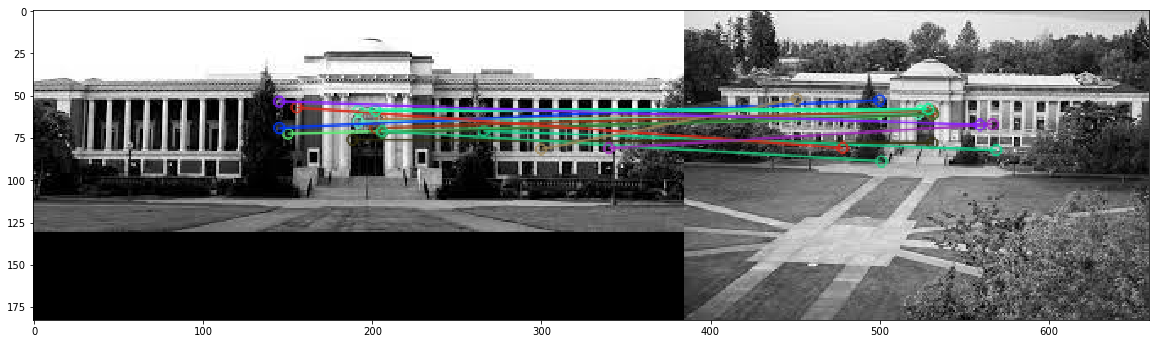

In [24]:
img1 = cv2.imread('./data/OSUMemo1.jpg',0)
img2 = cv2.imread('./data/OSUMemo2.jpg',0)
displayMatchingFeatures(img1,img2,15)